# Imports and datasets initialisation

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('.'))
if module_path not in sys.path:
    sys.path.append(module_path)
    

from src.pycogra.mismatch.ie import import_from_json, init_dataset
from src.pycogra.mismatch.objetcs import MismatchHandler
from src.pycogra.mismatch.plot import plot_single_dataset, barplot_instances, dataset_subfigures
dir_dataset: str = "datasets/"

dataset_cd: dict = {'swat.a3': dir_dataset + "swat-a3.json",
                    'cicids.17': dir_dataset + "cicids-17.json"}
mh_cd_l, dataset_cd_labels = init_dataset(dataset_in=dataset_cd)
    
dataset_ad = dir_dataset + 'swat-a6.json'
mh_ad: MismatchHandler = import_from_json(file_mismatch=dataset_ad)

# Communication dynamics analaysis (single dataset)

The following cell enables the analysis of the communication dynamics of a single dataset. The diagram shows the mismatching packet rates achieved per sub-step of the whitelist generation. For further information, please refer to §5 of the paper.

The variables of the next cell can be used to adjust the chart as follows:
- `dataset_cda`: Selection of the dataset. Please choose either 'swat.a3' or 'cicids.17'
- `plot`: Selection of the aspects to be shown in the diagram. Please use this varaiable as follows:
    - List of individual aspects of the packets causing a whitelist violation. This corresponds to the specification of the rule sets (see §3.2 of the paper) that contribute to the logging of mismatching packages:
        - `addr`: A new/unknown device was involved in the transmission of the packet. This corresponds to the rule r<sub>U</sub>.
        - `src`: A new sender out of the set of already known devices corresponding to the rule set R<sub>K<sub>src</sub></sub>
        - `dst`: A sender out of the set of known devices addresses an additional device. This corresponds to R<sub>K<sub>dst</sub></sub>
        - `tr`: A sending device uses a new transport-oriented communication protocol in an existing source-destination relation. This corresponds to R<sub>T</sub>
        - `pr`: A sending device uses a new application-oriented communication protocol in an existing source-destination relation (R<sub>P</sub>)
        - `pdu`: A sending device uses a new protocol-specific message type in an existing source-destination relation (R<sub>U</sub>)
    - String to indicate a predefined list of aspects to be displayed:
        - `a0`: All aspects listed above, with no distinction made between the associated rules.
        - `a1`: All aspects listed above, with distinction between device-oriented and communication-oriented rule sets.
        - `a2-dev`: Combined aspects of the device-oriented rules with differentiation between them.
        - `a2-com`: Combined aspects of the communication-oriented rules with differentiation between them.

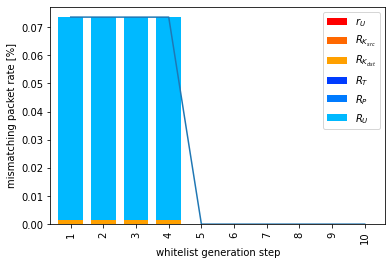

In [2]:
dataset_cda = 'swat.a3'
plot = ['addr', 'src', 'dst', 'tr', 'pr', 'pdu']
#plot = 'a2-dev'

plot_elems_combined = {'a0': ['all'],
                       'a1': ['dev', 'com'],
                       'a2-dev': ['addr', 'src', 'dst'],
                       'a2-com': ['tr', 'pr', 'pdu']}

if not isinstance(plot, list):
    plot = plot_elems_combined[plot]

mh_cda: MismatchHandler = import_from_json(file_mismatch=dataset_cd[dataset_cda])

g = plot_single_dataset(data_in=mh_cda, plot_elems=plot, notebook=True)

## Investigate whitelist mismatching communication

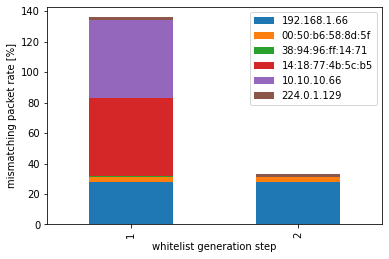

In [3]:
%matplotlib inline
instance_key: str = 'addr'
instance_index: list = [0, 1]

df = barplot_instances(data_in=mh_cda, instance_key=instance_key, instance_index=instance_index, notebook=True)

# Communication dynamics analaysis (multiple dataset comparison)

/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/home/ap/.local/lib/python3.6/site-packages/pandas/plotting/_tools.py:313: MatplotlibDeprecatio

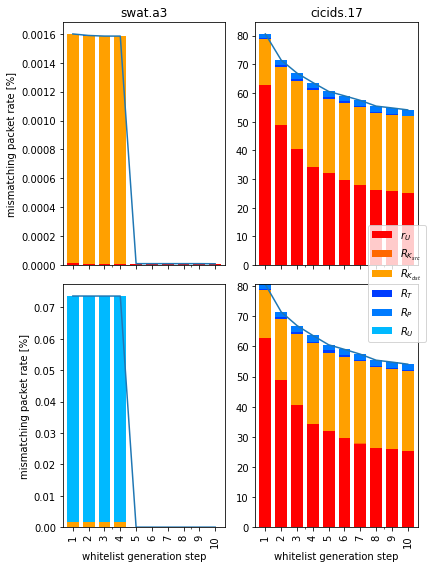

In [4]:
%matplotlib inline

plot_elems = [['addr', 'src', 'dst', 'tr', 'pr'], ['addr', 'src', 'dst', 'tr', 'pr', 'pdu']]


dataset_subfigures(data_in=mh_cd_l, labels=dataset_cd_labels, plot_elems_l=plot_elems, notebook=True)

# Attack detection capability

## Dataset description

The following table is based on the file **A6_Log.docx** provided by iTrust as part of the A6 dataset description. The first column corresponds to the notations of the sub-captures plotted by the next cells.

**Please note** that the communication whitelist is generated out of the sub-capture *00*.


| Name  	| Time 	| Event                                                                   	|
|-------	|------	|-------------------------------------------------------------------------	|
| 00    	| 1005 	| Capture pre-attack pcap for 15 mins                                     	|
| 01    	| 1020 	| Capture pcap for actual attack in 15 mins intervals                     	|
|       	| 1020 	| Infiltrate SCADA WS via USB thumb drive with first malware              	|
| 02    	| 1030 	| Exfiltrate Historian Data                                               	|
|       	| 1035 	| Sleep                                                                   	|
| 03    	| 1045 	| Exfiltrate Historian Data                                               	|
|       	| 1050 	| Sleep                                                                   	|
| 04    	| 1100 	| Exfiltrate Historian Data                                               	|
|       	| 1105 	| Sleep                                                                   	|
| 05    	| 1115 	| Exfiltrate Historian Data                                               	|
|       	| 1120 	| Sleep                                                                   	|
| 06-09 	| 1130 	| Rest 60 mins                                                            	|
| 10    	| 1230 	| Infiltrate SCADA WS with second malware, via downloading from C2 server 	|
|       	|      	| Disrupt Sensor and Actuator                                             	|
|       	| 1233 	| Sleep                                                                   	|
|       	| 1243 	| Disrupt Sensor and Actuator                                             	|
| 11    	| 1246 	| Sleep                                                                   	|
|       	| 1256 	| Disrupt Sensor and Actuator                                             	|
|       	| 1259 	| Sleep                                                                   	|
| 12    	| 1309 	| Disrupt Sensor and Actuator                                             	|
|       	| 1312 	| Sleep                                                                   	|
| 13    	| 1322 	| Disrupt Sensor and Actuator                                             	|
|       	| 1325 	| Sleep                                                                   	|
| 14    	| 1330 	| Stop actual attack pcap capture                                         	|
|       	|      	| Capture post-attack pcap for 15 mins                                    	|
|       	| 1345 	| Stop post attack pcap capture                                           	|
|       	|      	| RAM memory dump using FTKImager, extract when done                      	|
|       	|      	| Extract Historian .csv files                                            	|
|       	|      	| Extract malware .exe file for both attacks                              	|
|       	|      	| Extract VM image (.vmdk) of both SCADA WS and C2 server                 	|
|       	|      	| Extract capture pcap files from external monitoring VM                  	|


## Plotting the dataset

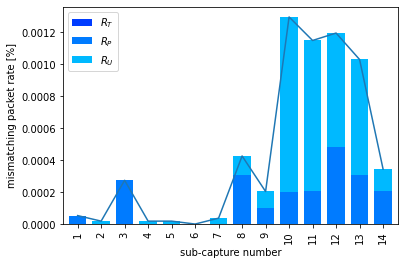

In [5]:
%matplotlib inline

plot_elems = {'a0': ['all'],
              'a1': ['dev', 'com'],
              'a2-dev': ['addr', 'src', 'dst'],
              'a2-com': ['tr', 'pr', 'pdu'],
              'a2-dev-com': ['addr', 'src', 'dst', 'com']}

g = plot_single_dataset(data_in=mh_ad, plot_elems=plot_elems['a2-com'], notebook=False)